Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
    
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
data.head()

In [6]:
data.shape

(50, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [8]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
data[data.duplicated()]  

,Murder,Assault,UrbanPop,Rape


In [10]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [11]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(data)

KMeans(n_clusters=14, random_state=0)

In [12]:
kmeans.inertia_

6297.229833333333

In [13]:
wcss=[]
for i in range(1,8):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss

[355807.8216,
 96399.02814449917,
 47964.26535714286,
 34728.629357142854,
 24417.023523809523,
 18768.000666666667,
 15463.473777777777]

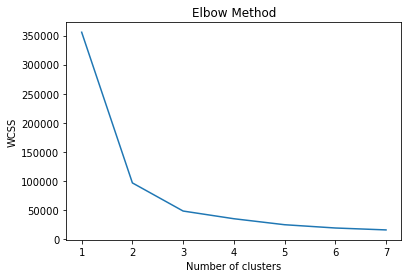

In [15]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(data)

KMeans(n_clusters=7, random_state=0)

In [17]:
clusters_new.labels_

array([0, 0, 4, 2, 4, 2, 1, 0, 5, 2, 6, 1, 0, 1, 6, 1, 1, 0, 6, 4, 3, 0,
       6, 0, 2, 1, 1, 0, 6, 3, 4, 0, 5, 6, 1, 3, 3, 1, 3, 4, 6, 2, 2, 1,
       6, 3, 3, 6, 6, 3])

In [18]:
df = pd.DataFrame(clusters_new.labels_, columns =['Cluster ID'])
df.head()

,Cluster ID
0,0
1,0
2,4
3,2
4,4


In [20]:
data1 = pd.concat([data,df], axis=1)
data1

,Murder,Assault,UrbanPop,Rape,Cluster ID
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,5
9,17.4,211,60,25.8,2


In [21]:
data1.groupby('Cluster ID').agg(['mean']).reset_index()

,Cluster ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.822222,250.555556,68.000000,28.000000
1,1,5.590000,112.400000,65.600000,17.270000
2,2,11.500000,195.333333,66.166667,27.433333
3,3,5.750000,156.750000,74.000000,19.400000
4,4,10.840000,286.800000,71.200000,30.800000
5,5,14.200000,336.000000,62.500000,24.000000
6,6,2.950000,62.700000,53.900000,11.510000


In [22]:
data1['Cluster ID'].value_counts()

1    10
6    10
0     9
3     8
2     6
4     5
5     2
Name: Cluster ID, dtype: int64